# King County Real Estate Market Analysis

#### Exploratory Data Analysis (EDA)

Exploratory data analysis is an initial critical process for identifying patterns, trends, statistical properties and testing hypotheses. It is an essential and important procedure to gather important and necessary information for the understanding of the data and conceivably to present an adequate solution for the customer or to solve a problem.
This notebook it is intended to explore the data in order to find the most significant features, that is, those that contain more relevant information.

## Imports

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, SelectPercentile, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, mean_absolute_error

%pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import time
import collections

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.optimizers import Adam

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorboard-data-server<0.7.0,>=0.6.0 in c:\users\fernando\anaconda3\envs\ml\lib\site-packages (from tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (0.6.1)



## Dataset Description

The data will be checked to see its type and check if there are missing values.

In [212]:
dataset = pd.read_csv('kc_house_data.csv')#loading data

In [213]:
dataset.isnull().values.any()#Null values checking
dataset.isnull().sum()#Sum of null values
dataset.drop_duplicates()#removing duplicates

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [214]:
dataset.info()#Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [215]:
dataset.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### Dataset features:

The data set contains twenty-one columns, of which nineteen are properties of the house as described below, in addition to the price, date of quotation and identification number, some characteristics are categorical, but most are numerical. A simple description of all features is shown below.

* id : Numeric flag assigned to each house
* date : Selling date
* price: Selling price
* bedrooms : INumber of bedrooms
* bathrooms : Number of bathrooms in a bedroom
* sqft_living : Livin area (square foot)
* sqft_lot : Land area (square foot)
* floors: Number of floors
* waterfront : Water front view
* view : how good the view of the property was
* condition : House condition
* grade : House designe quality
* sqft_above : Above the ground level area (square foot)
* sqft_basement : Basement area (square foot)
* yr_built : Build year
* yr_renovated : Renovation year
* zipcode : Zipcode
* lat : Latitude
* long : Longitude
* sqft_living15 : Living area 15 houses around
* sqft_lot15 : Land area 15 houses around

## Data Analysis

Before feature selection its necessary an exploratory overview, an essencial step that can help us to have insight about the price and features. Analysing correlation, dispersion, it can help us to find the most important features and learn how the data behave, with that information we can find outliers, tendencys, and possibly remove some features that wont improve our model prediction.

In [216]:
corr_matrix = dataset.iloc[:,2:].corr()#pearsons correlation
corr_features = corr_matrix.index #features names

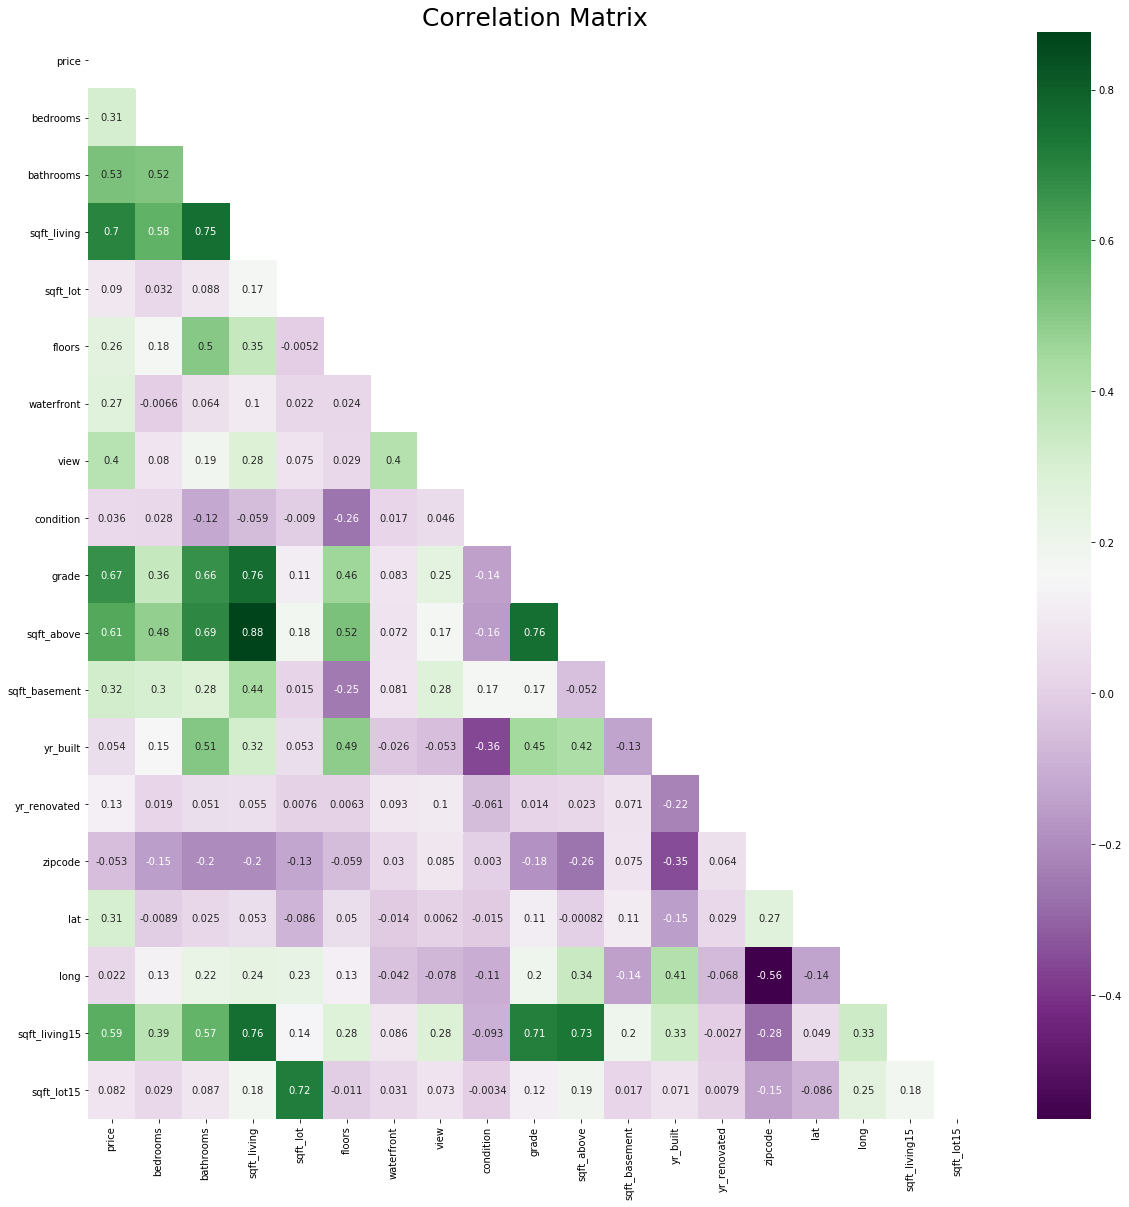

In [225]:
fig = plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', fontsize=25)
sb.heatmap(corr_matrix,annot=True,cmap="PRGn", mask=np.triu(corr_matrix))

Its possible to identify some features high correlated, as:
* grade / sqft_living (0.76)
* sqft_living / sqft_above (0.88)

The livingroom is on the ground floor and high correlated. Apparently its more important than the floor itself, which may indicate that it is not necessary to use both features to predict the price. As illustrated.

* sqft_living / price (0.7)
* sqft_above / price (0.61)

Grade and livingroom also can be related, a house with a elegant livingroom and modern design,  can be sold quickly and for a an excellent price. However there are unexplored details inside data, usefull to gather.

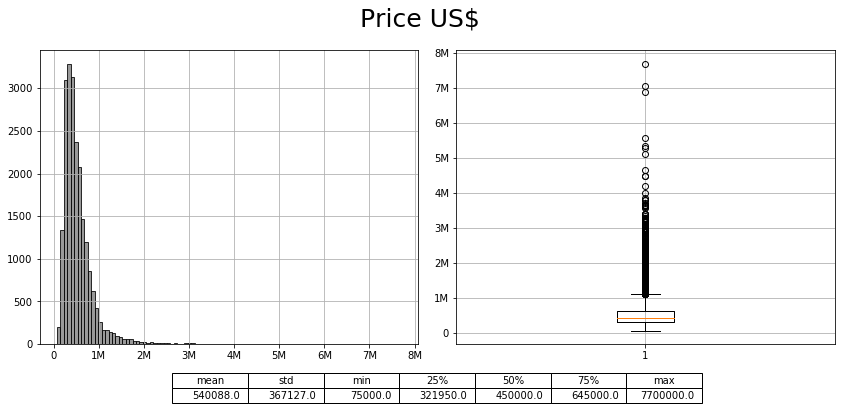

In [43]:
p_axis_ticks = list(np.arange(0,9000000,1000000))#x axis ticks location
p_ticks_labels = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M']#new xticks labels

txt = list(dataset.price.describe().index)[1:]#price describe labels (mean,std, etc)
txt_values = np.round(dataset.price.describe().values.flatten()[1:].reshape(1,-1))#price descrive values

fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplots_adjust(left=0.06, right=0.98, bottom=0.2, wspace=0.1, hspace=0.02)
fig.suptitle('Price US$', fontsize=25)

ax[0].hist(dataset.price.values,bins=100, alpha=0.8,edgecolor='black', color='grey')
ax[0].set_xticks(p_axis_ticks)
ax[0].set_xticklabels(p_ticks_labels)
ax[0].grid()

ax[1].boxplot(dataset.price.values)
ax[1].set_yticks(p_axis_ticks)
ax[1].set_yticklabels(p_ticks_labels)
ax[1].grid()

tab = ax[0].table(cellText=txt_values,
                      colLabels=txt,
                      bbox=[0.35, -0.2, 1.4, 0.1])
tab.auto_set_font_size(False)
plt.show()

As illustrated in the chart, most prices are under 1M, and the boxplot show cleary that from 1M up to 8M of prices are outliers. Lets check the percentile.

In [44]:
#outliers
total = dataset.price.count()
ab_1m = dataset.price.apply(lambda x: x>1000000).sum()
perc = ab_1m/dataset.price.count()*100
print(f"Total Houses: {total}\n1M to 8M$ (outliers): {ab_1m} ({perc:.2f}%)")

Total Houses: 21613
1M to 8M$ (outliers): 1465 (6.78%)


Extracting these outliers and setting new dataset

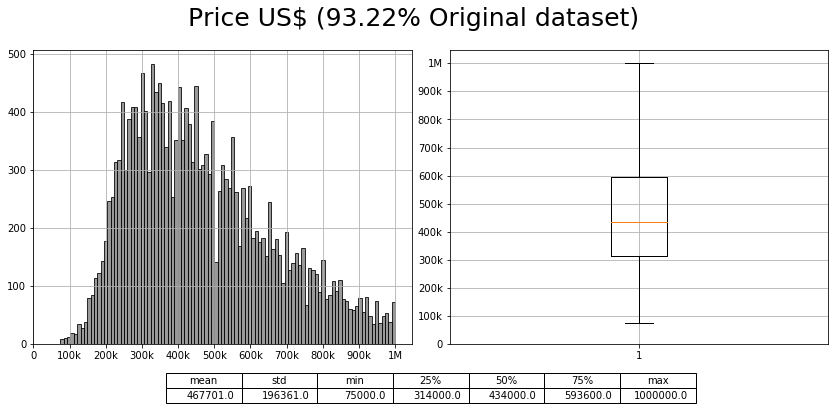

In [45]:
newdata = dataset.loc[dataset['price']<=1000000]#set new data

#same plot
p_axis_ticks = list(np.arange(0,1100000,100000))
p_ticks_labels = ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1M']
txt = list(newdata.price.describe().index)[1:]
txt_values = np.round(newdata.price.describe().values.flatten()[1:].reshape(1,-1))

fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplots_adjust(left=0.06, right=0.98, bottom=0.2, wspace=0.1, hspace=0.02)
fig.suptitle('Price US$ (93.22% Original dataset)', fontsize=25)

ax[0].hist(newdata.price.values,bins=100, alpha=0.8,edgecolor='black', color='grey')
ax[0].set_xticks(p_axis_ticks)
ax[0].set_xticklabels(p_ticks_labels)
ax[0].grid()

ax[1].boxplot(newdata.price.values)
ax[1].set_yticks(p_axis_ticks)
ax[1].set_yticklabels(p_ticks_labels)
ax[1].grid()

tab=ax[0].table(cellText=txt_values,
                      colLabels=txt,
                      bbox=[0.35, -0.2, 1.4, 0.1])
tab.auto_set_font_size(False)
tab.set_fontsize=20
plt.show()

In [46]:
col = dataset.price.describe().index[1:]#col labels
row = ['Original', 'New']#row labels
d1 = np.round(dataset.price.describe().values[1:])
d2 = np.round(newdata.price.describe().values[1:])
table1 = pd.DataFrame([d1,d2],columns=col, index=row)
table1

mean       std      min       25%       50%       75%  \
Oringinal  540088.0  367127.0  75000.0  321950.0  450000.0  645000.0   
New        467701.0  196361.0  75000.0  314000.0  434000.0  593600.0   

                 max  
Oringinal  7700000.0  
New        1000000.0

Comparing the old dataset and new, std is reduced by 46.5% and still covering 93% of original data wich can mean a good choise removing outliers. We should now check how features interact with price.

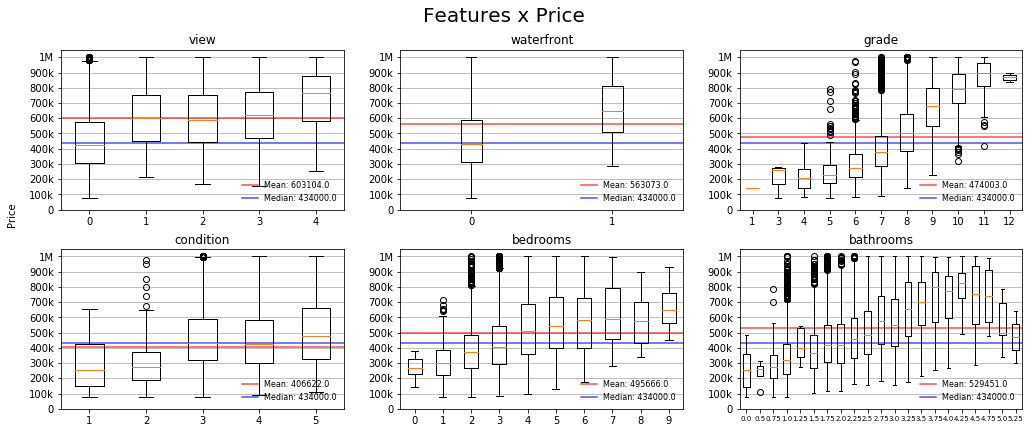

In [47]:
labels = ['view', 'waterfront', 'grade', 'condition', 'bedrooms', 'bathrooms']

r = 2#rows for subplot
c = 3#columns for subplot

#cor_original_sorted = dataset.iloc[:,2:].corr().price.sort_values(axis=0, ascending=False)

fig1, ax = plt.subplots(r,c,figsize=(15,6))
fig1.suptitle('Features x Price', fontsize=20)
plt.subplots_adjust(left=0.09, right=0.98, bottom=0.05, wspace=0.2, hspace=0.25)
p_axis_ticks = list(np.arange(0,1100000,100000))
p_ticks_labels = ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1M']
fig1.text(0.04, 0.5, 'Price', va='center', rotation='vertical')
pos = 0
for i in range(r):
    for j in range(c):
        if labels[pos] == 'sqft_living':
            ax[i,j].scatter(newdata[labels[pos]].values, newdata['price'].values, s=0.5)
            ax[i,j].title.set_text(labels[pos])
            ax[i,j].set_yticks(p_axis_ticks)
            ax[i,j].set_yticklabels(p_ticks_labels)
            pos+=1
        else:
            catg = list(newdata[labels[pos]].astype('category').cat.categories)
            val = [newdata['price'].loc[newdata[labels[pos]] == c] for c in catg]
            if labels[pos] == 'bedrooms':
                val = val[:-3]
                catg = catg[:-3]
            if labels[pos] == 'bathrooms':
                val = val[:-5]
                catg = catg[:-5]
                ax[i,j].set_xticklabels(labels=catg, fontsize=7)
            
            mean = np.asarray([cv.mean() for cv in val]).mean()
            med = []
            for k in val:
                med.extend(k)
            median = np.median(med)
            ax[i,j].axhline(mean, c='r', label= 'Mean: '+str(np.round(mean)), alpha=0.7)
            ax[i,j].axhline(median, c='b', label = 'Median: '+str(median), alpha=0.7)
            ax[i,j].boxplot(val, labels=catg)
            ax[i,j].title.set_text(labels[pos])
            ax[i,j].set_yticks(p_axis_ticks)
            ax[i,j].set_yticklabels(p_ticks_labels)
            ax[i,j].legend(loc='lower right',fontsize=8,framealpha=0)
            ax[i,j].grid(axis='y')
            pos+= 1
plt.show()


Here as can see how some features behave. 

As the view is better, the median price increases slightly.

The waterfront increases the price when analyzing the median of the box, but it also has a common range between 300k and 600k, that is, almost 50% of the houses on the waterfront, have the same price as those not on the waterfront, possibly meaning that its not a good feature.

The grade of the house has a clear effect on prices and can be a good candidate as feature.

As the condition is better, prices remain stable for 1 and 2, and for 3.4 and 5, so it is possibly not a good feature, since the grade represents a good design, which could imply a better material of construction

For bedrooms and bathrooms, it is interesting that there are houses with zero bedrooms and bathrooms, which make no sense and should be removed from the data set. In addition, the boxplot medians increase with the number of bedrooms and bathrooms, making it a candidate as feature.

In [48]:
#removing(14) 0 bedrooms and bathrooms 
newdata = newdata[newdata.apply(lambda x: x['bedrooms']>0 and x['bathrooms']>0, axis=1)]
l1 = len(newdata)

However, we still have some features as longitude and latitude to explore.

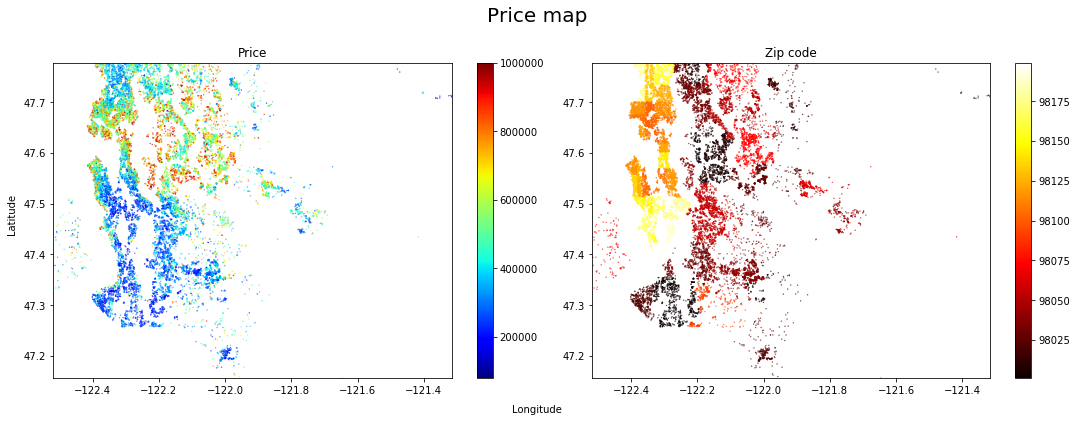

In [49]:
points= newdata[['long','lat', 'price', 'zipcode']].values

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Price map', fontsize=20)
plt.subplots_adjust(top=0.85, left=0.08, right=0.98, bottom=0.12, wspace=0.08, hspace=0.25)

ax[0].scatter(points[:,0], points[:,1], cmap='jet', c=points[:,2], s=0.1)
ax[0].title.set_text('Price')
ax[0].set_xlim((points[:,0].min(), points[:,0].max()))
ax[0].set_ylim((points[:,1].min(), points[:,1].max()))
pcm = ax[0].pcolormesh(np.stack([points[:,2], points[:,2]]), cmap='jet')
fig.colorbar(pcm, ax=ax[0])

ax[1].scatter(points[:,0], points[:,1], cmap='hot', c=points[:,3], s=0.1)
ax[1].title.set_text('Zip code')
ax[1].set_xlim((points[:,0].min(), points[:,0].max()))
ax[1].set_ylim((points[:,1].min(), points[:,1].max()))
pcm = ax[1].pcolormesh(np.stack([points[:,3], points[:,3]]), cmap='hot')
fig.colorbar(pcm, ax=ax[1])

fig.text(0.5, 0.04, 'Longitude', ha='center')
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical')
plt.show()

We can see using geographic position a concentrated area with the expensive houses 650k+, which can be a useful information to predict prices, also the price is more related with the latitute than longitude. Thereby its possible that zip code could be useless as feature, because it segment the map in small areas that do not represent the price distribution.

Finally the year of construction and renovation.

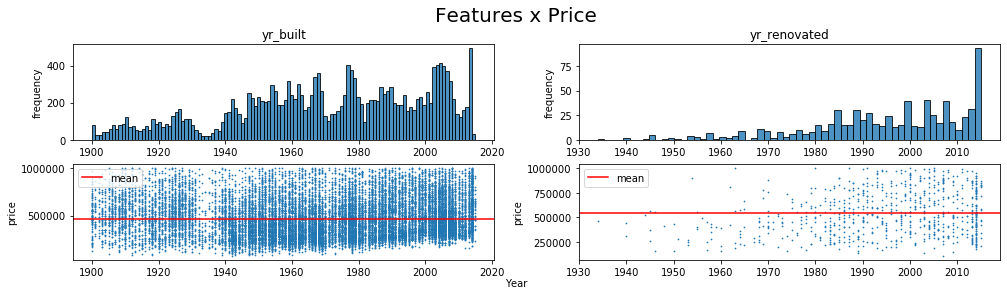

In [50]:
r = 2
c = 2

fig1, ax = plt.subplots(r,c,figsize=(14,4))
fig1.suptitle('Features x Price', fontsize=20)
plt.subplots_adjust(top=0.85, left=0.06, right=0.98, bottom=0.1, wspace=0.2, hspace=0.25)
p_axis_ticks = list(np.arange(0,1100000,100000))
p_ticks_labels = ['0', '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1M']


yrr = newdata.loc[newdata['yr_renovated']>0]

ax[0,0].hist(newdata['yr_built'].values, bins= 116, alpha=0.8,edgecolor='black')
ax[0,0].title.set_text('yr_built')
ax[0,0].set_ylabel('frequency')

ax[0,1].hist(yrr['yr_renovated'].values, bins=60, alpha=0.8, edgecolor='black')
ax[0,1].title.set_text('yr_renovated')
ax[0,1].set_ylabel('frequency')

ax[1,0].scatter(newdata['yr_built'].values, newdata['price'].values, s=0.5)
ax[1,0].axhline(newdata['price'].mean(), c='r', label='mean')
ax[1,0].set_ylabel('price')
ax[1,0].legend()

ax[1,1].scatter(yrr['yr_renovated'].values, yrr['price'].values, s=0.5)
ax[1,1].axhline(yrr['price'].mean(), c='r', label='mean', )
ax[1,1].set_ylabel('price')
ax[1,1].legend()

fig1.text(0.5, 0.01, 'Year', ha='center')
plt.show()


As we can see the year of construction and renovation the most recent is the most valuable houses. Despite the appreciation of the houses, it is a smooth increase, so it shouldn't be as good as it looks.

Now we need to inspect the area of the rooms, floors and lot.

No handles with labels found to put in legend.


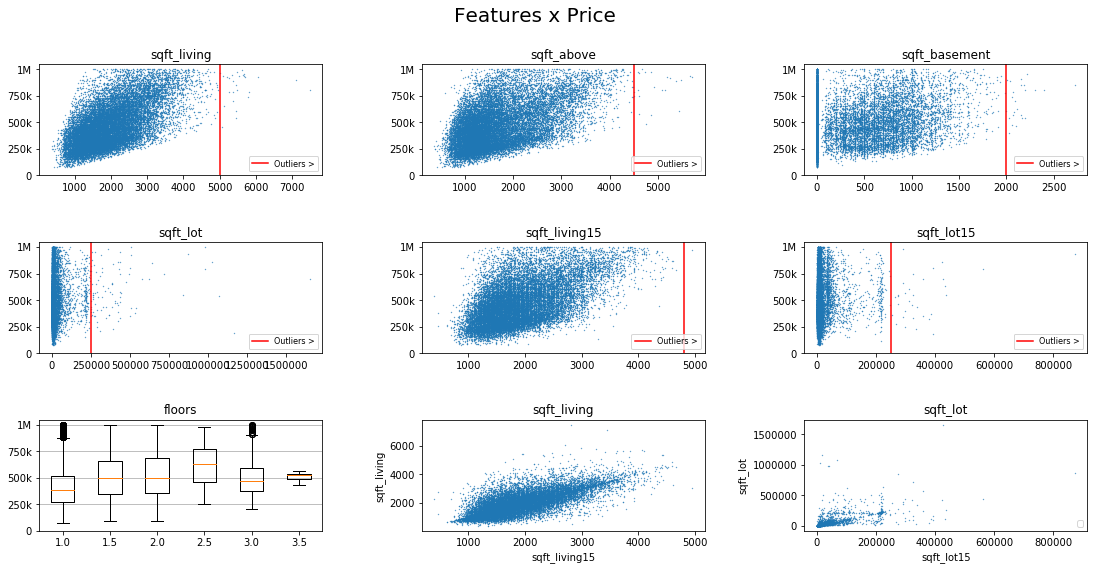

In [51]:
labels = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'floors',
          'sqft_living', 'sqft_lot']
r = 3
c = 3
fig, ax = plt.subplots(r, c, figsize=(16,8))
fig.suptitle('Features x Price', fontsize=20)
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.07, wspace=0.35, hspace=0.6)
lines= [5000, 4500, 2000, 250000, 4800, 250000, 0, 0, 60000]
pos = 0
for i in range(r):
    for j in range(c):
        if pos < 6:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata[labels[pos]].values, newdata['price'].values, s=0.1)
            ax[i, j].set_yticks(list(np.arange(0,1100000,250000)))
            ax[i, j].set_yticklabels(['0', '250k', '500k', '750k', '1M'])
            ax[i, j].axvline(lines[pos], c='r', label='Outliers >')
            ax[i, j].legend(loc='lower right', fontsize=8)
        
        if pos == 6:
            catg = list(newdata[labels[pos]].astype('category').cat.categories)
            val = [newdata['price'].loc[newdata[labels[pos]] == c] for c in catg]
            ax[i, j].boxplot(val)
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].set_yticks(list(np.arange(0,1100000,250000)))
            ax[i, j].set_yticklabels(['0', '250k', '500k', '750k', '1M'])
            ax[i, j].set_xticks(np.arange(1,7,1))
            ax[i, j].set_xticklabels(np.arange(1,4,0.5))
            ax[i, j].grid(axis = 'y')
        
        if pos == 7:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata['sqft_living15'].values, newdata[labels[pos]].values, s=0.1)
            ax[i, j].set_xlabel('sqft_living15')
            ax[i, j].set_ylabel(labels[pos])
            
            
        if pos == 8:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata['sqft_lot15'], newdata[labels[pos]].values, s=0.1)
            ax[i, j].set_xlabel('sqft_lot15')
            ax[i, j].set_ylabel(labels[pos])

            ax[i, j].legend(loc='lower right', fontsize=8)
        
        pos += 1

Living room and upper floor areas have a high correlation with price despite being scattered, indicating that they may be good features. The living area and living area of the 15 neighboring houses also have a high correlation, that is, the houses in the neighborhood have the same, or almost the same area, which can be a good feature or duplicate.

As it can be seen many houses have no basement and many others have, here we could change for a categorical variable since the price can possibly have a better correlation, but we will keep it like that.

Lot area and 15 houses lot area behaves strangely, basically a straight line in the origin, maybe if we cut off the outliers above 250.000 feet we can have something usefull, but for now looks like a useless feature.

As we can see there are few outliers for almost all the features illustrated, we should extract the outliers and proceed in our analysis.

In [52]:
#newdata = newdata[newdata.apply(lambda x: x['sqft_living']<5000 and x['sqft_above']<4500 and x['sqft_basement']<2000 
                  #and x['sqft_lot']<50000 and x['sqft_living15']<4800 and x['sqft_lot15']<60000, axis=1)]

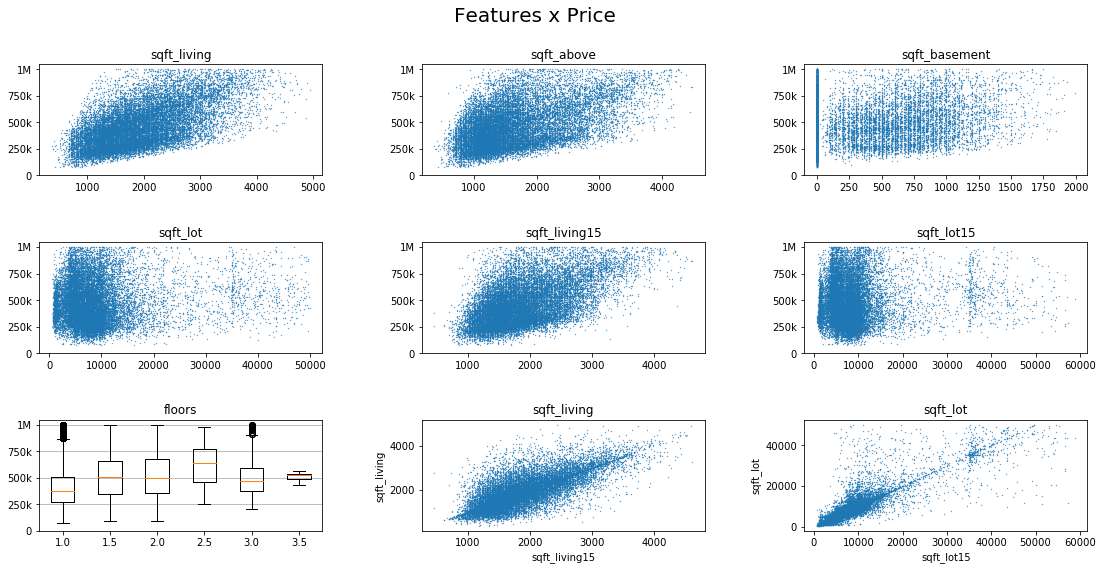

In [53]:
labels = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'floors',
          'sqft_living', 'sqft_lot']
r = 3
c = 3
fig, ax = plt.subplots(r, c, figsize=(16,8))
fig.suptitle('Features x Price', fontsize=20)
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.07, wspace=0.35, hspace=0.6)
pos = 0
for i in range(r):
    for j in range(c):
        if pos < 6:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata[labels[pos]].values, newdata['price'].values, s=0.1)
            ax[i, j].set_yticks(list(np.arange(0,1100000,250000)))
            ax[i, j].set_yticklabels(['0', '250k', '500k', '750k', '1M'])
        
        if pos == 6:
            catg = list(newdata[labels[pos]].astype('category').cat.categories)
            val = [newdata['price'].loc[newdata[labels[pos]] == c] for c in catg]
            ax[i, j].boxplot(val)
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].set_yticks(list(np.arange(0,1100000,250000)))
            ax[i, j].set_yticklabels(['0', '250k', '500k', '750k', '1M'])
            ax[i, j].set_xticks(np.arange(1,7,1))
            ax[i, j].set_xticklabels(np.arange(1,4,0.5))
            ax[i, j].grid(axis = 'y')
        
        if pos == 7:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata['sqft_living15'].values, newdata[labels[pos]].values, s=0.1)
            ax[i, j].set_xlabel('sqft_living15')
            ax[i, j].set_ylabel(labels[pos])
            
            
        if pos == 8:
            ax[i, j].title.set_text(labels[pos])
            ax[i, j].scatter(newdata['sqft_lot15'], newdata[labels[pos]].values, s=0.1)
            ax[i, j].set_xlabel('sqft_lot15')
            ax[i, j].set_ylabel(labels[pos])
        
        pos += 1

As we can see now, removing around 900 houses we have now 89% of the original dataset size, that means we removed by 6.8% of the orignial dataset that represents the overpriced outliers, and now we removed 4.2% corresponding to the filter of lot, livingroom, lot15, above, basement and living15 totalizing 11% of the inicial dataset.

It is clear now how lot and lot15 area are related with price and now its possible to say that both features shouldnt be good, because they are concentrated and it can mean no hight correlation with price.

We should check now date and price, but first we need to work the date format and use only year and month.

In [178]:
len(dataset)

21613

In [60]:
newdata.head()#before

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [61]:
#after
newdata['date'] = dataset['date'].apply(lambda x: str(x).split('T')[0][:-2])#datastring yyyymmdd to yyyymm
newdata.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  201410  221900.0         3       1.00         1180      5650   
1  6414100192  201412  538000.0         3       2.25         2570      7242   
2  5631500400  201502  180000.0         2       1.00          770     10000   
3  2487200875  201412  604000.0         4       3.00         1960      5000   
4  1954400510  201502  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

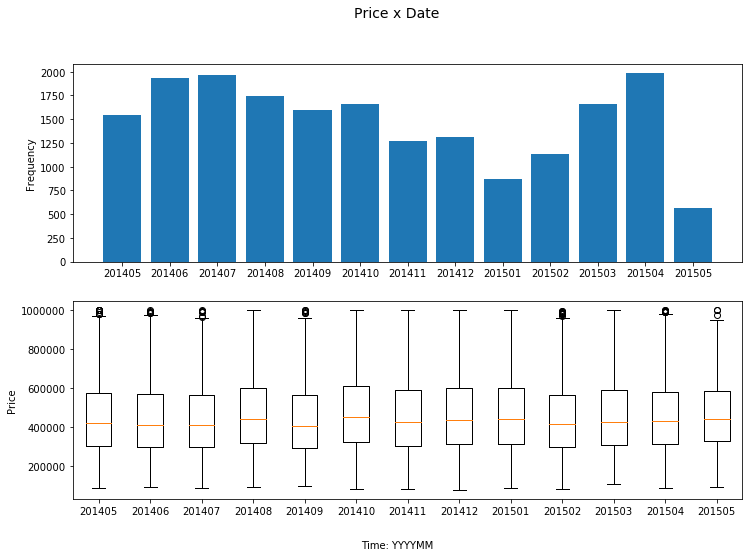

In [62]:
bins = collections.Counter(newdata['date'].values)#histogram counter
labels = list(bins.keys())
val = [newdata['price'].loc[newdata['date'] == c] for c in labels]#boxplot prices
hist = dict(sorted(bins.items()))


fig, ax = plt.subplots(2,1,figsize=(12,8))
fig.suptitle('Price x Date', fontsize=14)
fig.text(0.5, 0.04, 'Time: YYYYMM', ha='center')

ax[0].bar(hist.keys(), hist.values())
ax[0].set_ylabel('Frequency')

ax[1].boxplot(val)
ax[1].set_ylabel('Price')
ax[1].set_xticklabels(list(hist.keys()))
plt.show()

The number of houses sold over the year varies, but looking to the boxplot the average price of houses sold remains the same throughout.

## Feature Selection

After analyzing the data, it is necessary to choose the most important features, for that we will use several methods that qualify the features and at the end an average of the performances will be made. With this average, 3, 4 and 5 of the best features will be chosen for price prediction.

Based on feature selection http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

In [66]:
droped = newdata.drop(['id', 'date', 'zipcode'], axis=1)
features = droped.columns[1:]

In [67]:
scaler = MinMaxScaler().fit(droped)
scaled_mm = scaler.fit_transform(droped)
scaled_std = StandardScaler().fit_transform(droped)

The f_ranks function receives the features and scores, and returns a dict with normalized min_max scores so at the end we can create a dataframe

In [68]:
def f_ranked(score, features, order=1):
    rank = MinMaxScaler().fit_transform(order*np.asarray(score).reshape(-1,1)).flatten()
    return dict(zip(features, np.round(rank,2)))

In [69]:
f_ranks = dict()#creating dictionary to store information

In [70]:
#minmax dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_mm[:,1:], scaled_mm[:,0], test_size=0.3, random_state=42)
#std dataset
xx_train, xx_test, yy_train, yy_test = train_test_split(scaled_std[:,1:], scaled_std[:,0], test_size=0.3, random_state=42)

Pearson Correlatio measures the statistical correlation between the variables, a positive coefficient close to 1 indicates a strong connection and a linear correlation.

In [71]:
f_ranks['Corr.'] = f_ranked(droped.corr().price[1:].values, features)#storing

Recursive Feature Elimination (RFE): Select a feature based on score achived by a model like linear regressor, changing the variables and selecting the best ones

In [72]:
lr = LinearRegression().fit(x_train, y_train)

rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(xx_train,yy_train.flatten())

f_ranks['RFE_LR_mm'] = f_ranked(rfe.ranking_, features)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


LASSO:

In [73]:
lasso = Lasso(alpha=0.05)
lasso.fit(xx_train, yy_train)

f_ranks["Lasso_normal_std"] = f_ranked(np.abs(lasso.coef_), features)

Linear Regression:

In [74]:
lr = LinearRegression(normalize=True)
lr.fit(xx_train, yy_train)

f_ranks["LinReg_normal_std"] = f_ranked(np.abs(lr.coef_), features)

Ridge Regression:

In [75]:
ridge = Ridge(alpha = 1.2, max_iter=5000)
ridge.fit(x_train, y_train)

f_ranks['Ridge'] = f_ranked(np.abs(ridge.coef_), features)

Random Forest:

In [76]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(x_train,y_train.flatten())

f_ranks["RF_mm"] = f_ranked(rf.feature_importances_, features)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 2 of 50building tree 1 of 50building tree 3 of 50building tree 4 of 50

building tree 5 of 50

building tree 6 of 50
building tree 7 of 50building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50

building tree 12 of 50building tree 13 of 50

building tree 14 of 50building tree 15 of 50building tree 16 of 50



building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50building tree 24 of 50

building tree 25 of 50
building tree 26 of 50
building tree 27 of 50building tree 28 of 50

building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


Selecting K best with Multual Information

In [77]:
skb = SelectKBest(mutual_info_regression, k = 'all').fit(x_train, y_train.flatten()).scores_
f_ranks['skb_mi_mm'] = f_ranked(skb, features)

Now it will be calculated the mean of all methods and this will be the final features importance.

In [78]:
m_mean = dict()
for feature in features:
    m_mean[feature] = np.round(np.mean([f_ranks[method][feature] for method in f_ranks.keys()]), 2)
f_ranks['Mean'] = m_mean

In [79]:
table_t = pd.DataFrame(f_ranks)#creating a dataframe to see all methods score

In [80]:
table_t

Corr.  RFE_LR_mm  Lasso_normal_std  LinReg_normal_std  Ridge  \
bedrooms        0.43       0.81              0.00               0.05   0.38   
bathrooms       0.68       0.50              0.03               0.14   0.20   
sqft_living     0.98       0.00              0.77               0.36   0.27   
sqft_lot        0.08       0.88              0.00               0.01   0.02   
floors          0.40       0.38              0.04               0.15   0.08   
waterfront      0.02       0.75              0.00               0.07   0.28   
view            0.32       0.31              0.18               0.17   0.15   
condition       0.00       0.44              0.11               0.19   0.16   
grade           1.00       0.12              0.92               0.96   1.00   
sqft_above      0.81       0.62              0.00               0.27   0.24   
sqft_basement   0.32       0.69              0.00               0.14   0.09   
yr_built        0.00       0.19              0.41               0.70   0.34   
yr_renovated    0.07       1.00              0.00               0.00   0.00   
lat             0.74       0.06              1.00               1.00   0.56   
long            0.03       0.94              0.00               0.00   0.02   
sqft_living15   0.89       0.25              0.30               0.40   0.37   
sqft_lot15      0.06       0.56              0.00               0.08   0.11   

               RF_mm  skb_mi_mm  Mean  
bedrooms        0.00       0.18  0.26  
bathrooms       0.01       0.40  0.28  
sqft_living     0.69       0.68  0.54  
sqft_lot        0.03       0.14  0.17  
floors          0.00       0.17  0.17  
waterfront      0.00       0.00  0.16  
view            0.02       0.05  0.17  
condition       0.01       0.03  0.13  
grade           0.13       0.68  0.69  
sqft_above      0.04       0.49  0.35  
sqft_basement   0.01       0.10  0.19  
yr_built        0.05       0.22  0.27  
yr_renovated    0.00       0.03  0.16  
lat             1.00       1.00  0.77  
long            0.11       0.28  0.20  
sqft_living15   0.07       0.55  0.40  
sqft_lot15      0.03       0.18  0.15

In [81]:
mean_s = dict(sorted(m_mean.items(), key=lambda x: x[1]))#sorting features by importance

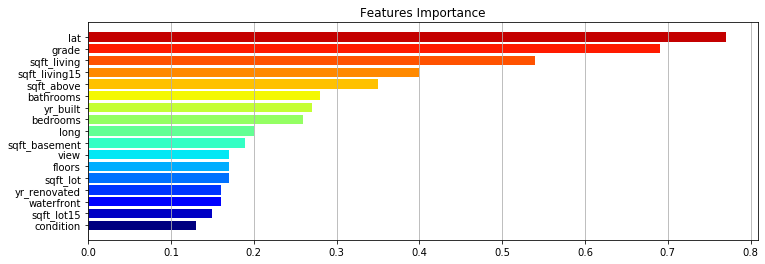

In [82]:
jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0, 1, 18))

data = list(mean_s.values())
label = list(mean_s.keys())

fig = plt.figure(figsize=(12,4))
plt.title('Features Importance')
plt.barh(label, data, color = newcolors)
plt.grid(axis='x')

This chart shows features relevance, it confirm the previous data analysis.

Living room area, latitude, grade, upstair floor area are good features as we determined, living room_15 still good as living room and could mean duplicate.

Bathooms, badrooms, basement area, longitude, year built and lot area intermediate features, bellow lot area remain the worst features.

Now we will make a comparation, first we will train a serie of models adding feature by feature from the top to the botton following the rank, and measure the increment of mse and mae of the predictiton data. Beside that, we will do the same test with the original dataset to compare if the outliers harm the model accuracy and prediciton.

In [84]:
#creating train test data using the data 
final_data = pd.DataFrame(data=scaled_mm, columns=droped.columns)

xf_train, xf_test, yf_train, yf_test = train_test_split(final_data.iloc[:,1:], final_data.iloc[:,0], test_size=0.1)

In [186]:
#scaling the initial dataset and creating train test data
scaler_id = MinMaxScaler().fit(dataset.drop(['id', 'date', 'zipcode'], axis=1))
scaled_mm_id = scaler_id.fit_transform(dataset.drop(['id', 'date', 'zipcode'], axis=1))

final_idata = pd.DataFrame(data=scaled_mm_id, columns=droped.columns).sample(n=len(final_data), random_state=1)

xi_train, xi_test, yi_train, yi_test = train_test_split(final_idata.iloc[:,1:], final_idata.iloc[:,0], test_size=0.1)

In [209]:
#creating a neural network with 4 layers, 75 neurons with dropout to avoid overtrainning, could be any structure.
def models(input_n):
    
    model = Sequential()
    
    model.add(Dense(75, activation='relu', input_shape=(input_n, )))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(75, activation='relu', input_shape=(75, )))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(75, activation='relu', input_shape=(75, )))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(75, activation='relu', input_shape=(75, )))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1))
    
    model.summary()
    
    model.compile(loss='mean_squared_error',optimizer=Adam(),metrics=['mse'])
    return model

First it need to be checked if livin15 and living are duplicate, three models will be trainned, the first with the features lat,grade, sqft_living, the second lat, grade,sqft_15 and the third with lat, grade, sqft_living and sqft_living15.

In [127]:
list_test1 = [['price', 'lat', 'grade', 'sqft_living'], 
              ['price', 'lat', 'grade', 'sqft_living15'],
              ['price', 'lat', 'grade', 'sqft_living', 'sqft_living15']]
pred_test = []
ind = []
for i in range(len(list_test1)):    
    scaler_t = MinMaxScaler().fit_transform(newdata[list_test1[i]])
    frame = pd.DataFrame(data=scaler_t, columns=list_test1[i])
    xtest_train, xtest_test, ytest_train, ytest_test = train_test_split(frame.iloc[:,1:], frame.iloc[:,0], test_size=0.1)
    model = models(len(list_test1[i])-1)
    model.fit(xtest_train.values, ytest_train.values, batch_size = 200, epochs = 1000, verbose=1, validation_data =(xtest_test.values, ytest_test.values))
    pred = model.predict(xtest_test.values)
    pred_test.append(pred)
    ind.append([list_test1[i], mean_squared_error(ytest_test.values, pred), mean_absolute_error(ytest_test.values, pred)])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 50)                200       
_________________________________________________________________
batch_normalization_52 (Batc (None, 50)                200       
_________________________________________________________________
dropout_52 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_53 (Batc (None, 50)                200       
_________________________________________________________________
dropout_53 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 50)              

17313/17313 [==============================] - 0s 12us/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 106/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 107/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 108/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 109/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 110/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 111/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 112/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 222/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 223/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 224/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 225/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 226/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 227/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 228/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 338/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 339/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 340/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 341/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 342/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 343/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 344/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 454/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 455/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 456/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 457/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 458/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 459/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 460/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 570/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 571/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 572/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 573/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 574/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 575/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 576/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 686/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 687/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 688/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 689/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 690/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 691/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 692/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 802/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 803/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 804/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 805/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 806/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 807/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 808/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 918/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 919/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 920/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 921/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 922/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 923/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 924/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 22/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 23/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 24/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 25/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 26/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 27/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 28/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 138/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 139/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 140/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 141/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 142/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 143/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 144/1000
17313/17313 [

17313/17313 [==============================] - 0s 11us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 254/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 255/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 256/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 257/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 258/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 259/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 260/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 370/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 371/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 372/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 373/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 374/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 375/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 376/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 486/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 487/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 488/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 489/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 490/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 491/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 492/1000
17313/17313 [

17313/17313 [==============================] - 0s 14us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 602/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 603/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 604/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 605/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 606/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 607/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 608/1000
17313/17313 [

17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 718/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 719/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 720/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 721/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 722/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 723/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 724/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 834/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 835/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 836/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 837/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 838/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 839/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 840/1000
17313/17313 [

17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 950/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 951/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 952/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 953/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 954/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 955/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 956/1000
17313/17313 [

Train on 17313 samples, validate on 1924 samples
Epoch 1/1000
17313/17313 [==============================] - 1s 43us/step - loss: 1.2942 - mse: 1.2942 - val_loss: 0.0857 - val_mse: 0.0857
Epoch 2/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.5191 - mse: 0.5191 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 3/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.3264 - mse: 0.3264 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 4/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.2196 - mse: 0.2196 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 5/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 6/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 7/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0741 - mse: 0.0741 - val_loss: 0.0

17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 118/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 119/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 120/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 121/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 122/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 123/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 124/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 234/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 235/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 236/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 237/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 238/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 239/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 240/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 350/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 351/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 352/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 353/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 354/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 355/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 356/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 466/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 467/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 468/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 469/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 470/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 471/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 472/1000
17313/17313 [

17313/17313 [==============================] - 0s 11us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 582/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 583/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 584/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 585/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 586/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 587/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 588/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 698/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 699/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 700/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 701/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 702/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 703/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 704/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 814/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 815/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 816/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 817/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 818/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 819/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 820/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 930/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 931/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 932/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 933/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 934/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 935/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 936/1000
17313/17313 [

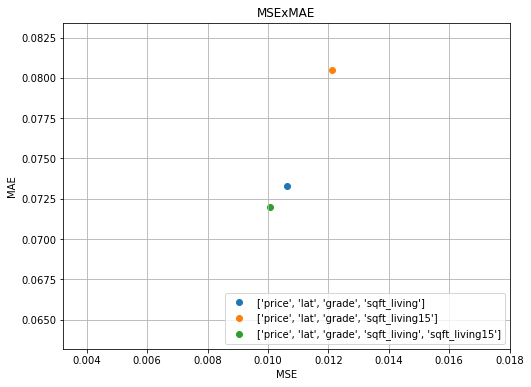

In [133]:
fig = plt.figure(figsize=(8,6))
plt.title('MSExMAE')
plt.scatter(ind[0][1], ind[0][2], label=ind[0][0])
plt.scatter(ind[1][1], ind[1][2], label=ind[1][0])
plt.scatter(ind[2][1], ind[2][2], label=ind[2][0])
plt.xlabel('MSE')
#plt.xlim(0.01, 0.0125)
plt.ylabel('MAE')
#plt.ylim(0.072, 0.081)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

As shown the feature sqft_living15 is worst than sqft_living, and both at the same time doenst have an consistent improvement if compared to the model using only sqft_living, it could means a duplicate feature, also we can extend that for sqft_lot15 and remove both features.

The final features are shown in the chart bellow.

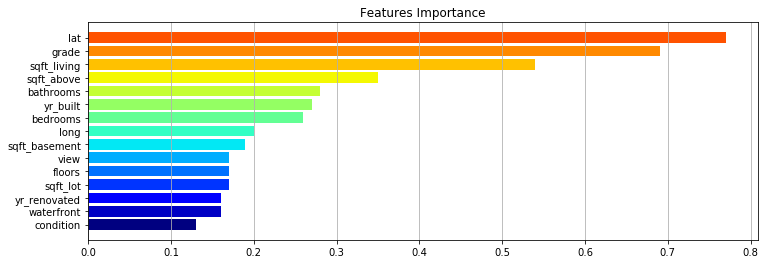

In [134]:
jet = cm.get_cmap('jet', 256)
newcolors = jet(np.linspace(0, 1, 18))
mean_s.pop('sqft_living15')
mean_s.pop('sqft_lot15')

data = list(mean_s.values())
label = list(mean_s.keys())

fig = plt.figure(figsize=(12,4))
plt.title('Features Importance')
plt.barh(label, data, color = newcolors)
plt.grid(axis='x')

A test will be performed to measure how much improvement each feature can provide

In [179]:
#training with final dataset
n_f = 1
f_s = []
f_p = []
for i in range(len(list(mean_s.keys()))):
    feature = list(mean_s.keys())[::-1][:n_f]
    model = models(n_f)
    model.fit(xf_train[feature[:]].values, yf_train.values, batch_size = 200, epochs = 1000, verbose=1, validation_data = (xf_test[feature[:]].values, yf_test.values))
    pred = model.predict(xf_test[feature].values)
    f_p.append(pred)
    f_s.append([feature, mean_squared_error(yf_test.values, pred), mean_absolute_error(yf_test.values, pred)])    
    n_f+=1

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 50)                100       
_________________________________________________________________
batch_normalization_106 (Bat (None, 50)                200       
_________________________________________________________________
dropout_106 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 50)                2550      
_________________________________________________________________
batch_normalization_107 (Bat (None, 50)                200       
_________________________________________________________________
dropout_107 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 50)              

17313/17313 [==============================] - 0s 12us/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 106/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 107/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 108/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 109/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 110/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 111/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 112/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 222/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 223/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 224/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 225/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 226/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 227/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 228/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 338/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 339/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 340/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 341/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 342/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 343/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 344/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 454/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 455/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 456/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 457/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 458/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 459/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 460/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 570/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 571/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 572/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 573/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 574/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 575/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 576/1000
17313/17313 [

17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 686/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 687/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 688/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 689/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 690/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 691/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 692/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 802/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 803/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 804/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 805/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 806/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 807/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 808/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 918/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 919/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 920/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 921/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 922/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 923/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 924/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 22/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 23/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 24/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 25/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 26/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 27/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 28/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 138/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 139/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 140/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 141/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 142/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 143/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 144/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 254/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 255/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 256/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 257/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 258/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 259/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 260/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 370/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 371/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 372/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 373/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 374/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 375/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 376/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 486/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 487/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 488/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 489/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 490/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 491/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 492/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 602/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 603/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 604/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 605/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 606/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 607/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 608/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 718/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 719/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 720/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 721/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 722/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 723/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 724/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 834/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 835/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 836/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 837/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 838/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 839/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 840/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 950/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 951/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 952/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 953/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 954/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 955/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 956/1000
17313/17313 [

Train on 17313 samples, validate on 1924 samples
Epoch 1/1000
17313/17313 [==============================] - 1s 48us/step - loss: 0.8243 - mse: 0.8243 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 2/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.3220 - mse: 0.3220 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 3/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.2014 - mse: 0.2014 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 4/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.1325 - mse: 0.1325 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 5/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 6/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0637 - mse: 0.0637 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 7/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0

17313/17313 [==============================] - 0s 11us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 118/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 119/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 120/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 121/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 122/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 123/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 124/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 234/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 235/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 236/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 237/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 238/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 239/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 240/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 350/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 351/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 352/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 353/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 354/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 355/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 356/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 466/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 467/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 468/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 469/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 470/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 471/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 472/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 582/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 583/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 584/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 585/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 586/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 587/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 588/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 698/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 699/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 700/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 701/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 702/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 703/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 704/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 814/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 815/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 816/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 817/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 818/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 819/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 820/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 930/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 931/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 932/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 933/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 934/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 935/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 936/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 34/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 35/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 36/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 37/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 38/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 39/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 40/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 13us/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 150/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 151/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 152/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 153/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 154/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 155/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 156/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 266/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 267/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 268/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 269/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 270/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 271/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 272/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 382/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 383/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 384/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 385/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 386/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 387/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 388/1000
17313/17313 [

17313/17313 [==============================] - 0s 14us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 498/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 499/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 500/1000
17313/17313 [==============================] - 0s 17us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 501/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 502/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 503/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 504/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 614/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 615/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 616/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 617/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 618/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 619/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 620/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 730/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 731/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 732/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 733/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 734/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 735/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 736/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 846/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 847/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 848/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 849/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 850/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 851/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 852/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 962/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 963/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 964/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 965/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 966/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 967/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 968/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 8/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 9/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 10/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 11/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 12/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 13/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 14/1000
17313/17313 [=========

17313/17313 [==============================] - 0s 12us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 124/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 125/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 126/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 127/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 128/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 129/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 130/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 240/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 241/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 242/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 243/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 244/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 245/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 246/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 356/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 357/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 358/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 359/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 360/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 361/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 362/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 472/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 473/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 474/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 475/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 476/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 477/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 478/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 588/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 589/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 590/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 591/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 592/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 593/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 594/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 704/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 705/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 706/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 707/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 708/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 709/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 710/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 820/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 821/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 822/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 823/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 824/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 825/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 826/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 936/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 937/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 938/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 939/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 940/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 941/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 942/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 40/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 41/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 42/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 43/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 44/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 45/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 46/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 156/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 157/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 158/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 159/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 160/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 161/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 162/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 272/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 273/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 274/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 275/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 276/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 277/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 278/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 388/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 389/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 390/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 391/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 392/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 393/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 394/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 504/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 505/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 506/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 507/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 508/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 509/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 510/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 620/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 621/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 622/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 623/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 624/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 625/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 626/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 736/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 737/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 738/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 739/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 740/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 741/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 742/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 852/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 853/1000
17313/17313 [==============================] - 0s 16us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 854/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 855/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 856/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 857/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 858/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 968/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 969/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 970/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 971/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 972/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 973/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 974/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 72/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 73/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 74/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 75/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 76/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 77/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 78/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 188/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 189/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 190/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 191/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 192/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 193/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 194/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 304/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 305/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 306/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 307/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 308/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 309/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 310/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 420/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 421/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 422/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 423/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 424/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 425/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 426/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 536/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 537/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 538/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 539/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 540/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 541/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 542/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 652/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 653/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 654/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 655/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 656/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 657/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 658/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 768/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 769/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 770/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 771/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 772/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 773/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 774/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 884/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 885/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 886/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 887/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 888/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 889/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 890/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 1000/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 50)                450       
_________________________________________________________________
batch_normalization_127 (Bat (None, 50)                200       
_________________________________________________________________
dropout_127 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_170 (Dense)            (None, 50)                2550      
_________________________________________________________________
batch_normalization_128 (Bat (None, 50)          

17313/17313 [==============================] - 0s 17us/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 104/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 105/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 106/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 107/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 108/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 109/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 110/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 220/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 221/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 222/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 223/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 224/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 225/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 226/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 336/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 337/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 338/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 339/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 340/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 341/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 342/1000
17313/17313 [

17313/17313 [==============================] - 0s 14us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 452/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 453/1000
17313/17313 [==============================] - 0s 18us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 454/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 455/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 456/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 457/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 458/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 568/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 569/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 570/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 571/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 572/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 573/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 574/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 684/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 685/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 686/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 687/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 688/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 689/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 690/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 800/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 801/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 802/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 803/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 804/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 805/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 806/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 916/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 917/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 918/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 919/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 920/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 921/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 922/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 20/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 21/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 22/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 23/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 24/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 25/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 26/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 136/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 137/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 138/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 139/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 140/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 141/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 142/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 252/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 253/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 254/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 255/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 256/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 257/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 258/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 368/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 369/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 370/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 371/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 372/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 373/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 374/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 484/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 485/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 486/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 487/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 488/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 489/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 490/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 600/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 601/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 602/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 603/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 604/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 605/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 606/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 716/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 717/1000
17313/17313 [==============================] - 0s 11us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 718/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 719/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 720/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 721/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 722/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 832/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 833/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 834/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 835/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 836/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 837/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 838/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 948/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 949/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 950/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 951/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 952/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 953/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 954/1000
17313/17313 [

Train on 17313 samples, validate on 1924 samples
Epoch 1/1000
17313/17313 [==============================] - 1s 50us/step - loss: 0.7442 - mse: 0.7442 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 2/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.2957 - mse: 0.2957 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 3/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.1782 - mse: 0.1782 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 4/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 5/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 6/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0

17313/17313 [==============================] - 0s 17us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 118/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 119/1000
17313/17313 [==============================] - 0s 15us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 120/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 121/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 122/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 123/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 124/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 234/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 235/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 236/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 237/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 238/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 239/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 240/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 350/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 351/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 352/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 353/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 354/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 355/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 356/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 466/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 467/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 468/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 469/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 470/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 471/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 472/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 582/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 583/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 584/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 585/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 586/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 587/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 588/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 698/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 699/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 700/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 701/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 702/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 703/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 704/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 814/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 815/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 816/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 817/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 818/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 819/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 820/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 930/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 931/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 932/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 933/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 934/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 935/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 936/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 34/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 35/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 36/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 37/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 38/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 39/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 40/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 150/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 151/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 152/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 153/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 154/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 155/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 156/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 266/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 267/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 268/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 269/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 270/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 271/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 272/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 382/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 383/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 384/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 385/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 386/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 387/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 388/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 498/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 499/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 500/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 501/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 502/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 503/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 504/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 614/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 615/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 616/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 617/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 618/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 619/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 620/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 730/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 731/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 732/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 733/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 734/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 735/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 736/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 846/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 847/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 848/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 849/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 850/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 851/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 852/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 962/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 963/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 964/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 965/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 966/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 967/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 968/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 8/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 9/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 10/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 11/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 12/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 13/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 14/1000
17313/17313 [=========

17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 124/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 125/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 126/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 127/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 128/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 129/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 130/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 240/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 241/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 242/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 243/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 244/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 245/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 246/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 356/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 357/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 358/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 359/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 360/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 361/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 362/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 472/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 473/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 474/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 475/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 476/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 477/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 478/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 588/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 589/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 590/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 591/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 592/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 593/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 594/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 704/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 705/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 706/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 707/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 708/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 709/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 710/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 820/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 821/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 822/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 823/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 824/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 825/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 826/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 936/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 937/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 938/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 939/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 940/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 941/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 942/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 40/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 41/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 42/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 43/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 44/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 45/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 46/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 156/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 157/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 158/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 159/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 160/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 161/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 162/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 272/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 273/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 274/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 275/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 276/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 277/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 278/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 388/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 389/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 390/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 391/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 392/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 393/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 394/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 504/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 505/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 506/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 507/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 508/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 509/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 510/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 620/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 621/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 622/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 623/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 624/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 625/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 626/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 736/1000
17313/17313 [==============================] - 0s 14us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 737/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 738/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 739/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 740/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 741/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 742/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 852/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 853/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 854/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 855/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 856/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 857/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 858/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 968/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 969/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 970/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 971/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 972/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 973/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 974/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 72/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 73/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 74/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 75/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 76/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 77/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 78/1000
17313/17313 [=======

17313/17313 [==============================] - 0s 12us/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 188/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 189/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 190/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 191/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 192/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 193/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 194/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 304/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 305/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 306/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 307/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 308/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 309/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 310/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 420/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 421/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 422/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 423/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 424/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 425/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 426/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 536/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 537/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 538/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 539/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 540/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 541/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 542/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 652/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 653/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 654/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 655/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 656/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 657/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 658/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 768/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 769/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 770/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 771/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 772/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 773/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 774/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 884/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 885/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 886/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 887/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 888/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 889/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 890/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1000/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0068 - val_mse: 0.0068
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 50)                800       
_________________________________________________________________
batch_normalization_148 (Bat (None, 50)                200       
_________________________________________________________________
dropout_148 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 50)                2550      
_________________________________________________________________
batch_normalization_149 (Bat (None, 50)          

17313/17313 [==============================] - 0s 12us/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 104/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 105/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 106/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 107/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 108/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 109/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 110/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 220/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 221/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 222/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 223/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 224/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 225/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 226/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 336/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 337/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 338/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 339/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 340/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 341/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 342/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 452/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 453/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 454/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 455/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 456/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 457/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 458/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 568/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 569/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 570/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 571/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 572/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 573/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 574/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 684/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 685/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 686/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 687/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 688/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 689/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 690/1000
17313/17313 [

17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 800/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 801/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 802/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 803/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 804/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 805/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 806/1000
17313/17313 [

17313/17313 [==============================] - 0s 13us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 916/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 917/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 918/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 919/1000
17313/17313 [==============================] - 0s 12us/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 920/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 921/1000
17313/17313 [==============================] - 0s 13us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 922/1000
17313/17313 [

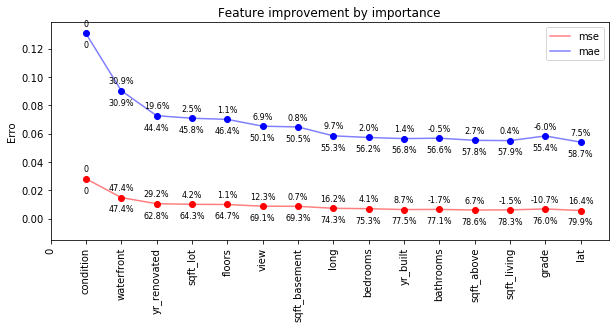

In [208]:
##plotting feature improvement
l1 = [len(i[0]) for i in f_s]
l2 = [i[1] for i in f_s]
l3 = [i[2] for i in f_s]

l4 =[len(i[0]) for i in fi_s]
l5 =[i[1] for i in fi_s]
l6 =[i[2] for i in fi_s]

fig = plt.figure(figsize=(10,4))
plt.title('Feature improvement by importance')
plt.scatter(l1, l2, c='r')
plt.plot(l1, l2, c='r', label='mse', alpha=0.5)
sm = 0
for i in range(len(l2)):
    if i == 0:
        label = str(0)
        label2 = str(0)
        label3=str(0)
    else:
        label = str(round((l2[i-1] - l2[i])/l2[i-1]*100, 1))+'%'
        sm += abs(l2[i-1] - l2[i])/l2[i-1]*100
        label2 = str(round(sm,1))+'%'
        label3 = str(round(abs(l2[0] - l2[i])/l2[0]*100, 1))+'%'
    plt.annotate(label, (l1[i], l2[i]), xytext=(l1[i],l2[i]+0.005), fontsize=8, ha='center')
    plt.annotate(label3, (l1[i], l2[i]), xytext=(l1[i],l2[i]-0.01), fontsize=8, ha='center')

plt.scatter(l1, l3, c='b')
plt.plot(l1, l3, c='b', label='mae', alpha=0.5)
sm = 0
for i in range(len(l2)):
    if i == 0:
        label = str(0)
        label2 = str(0)
        label3 = str(0)
    else:
        label = str(round((l3[i-1] - l3[i])/l3[i-1]*100, 1))+'%'
        sm += abs(l3[i-1] - l3[i])/l3[i-1]*100
        label2 = str(round(sm,1))+'%'
        label3 = str(round(abs(l3[0] - l3[i])/l3[0]*100, 1))+'%'
    plt.annotate(label, (l1[i], l3[i]), xytext=(l1[i],l3[i]+0.005), fontsize=8, ha='center')
    plt.annotate(label3, (l1[i], l3[i]), xytext=(l1[i],l3[i]-0.01), fontsize=8, ha='center')

plt.xticks(range(0,len(l2)+1),list('0') + list(mean_s.keys()), rotation=90)
plt.ylabel('Erro')
plt.legend()
plt.show()

The upper numbers means the imporvement related to the last dot (feature), the lower numbers means the  improvement related to the initial dot, for example the last dot represent all 15 features and has an improvement of 7.5% if compared with 14 features and is 58.7% better if compared with only one feature.

## Conclusion

Exploratory data analysis is an important and necessary step for understanding the data, finding the best way to use the information contained in the data and finding patterns or trends contained therein is the most relevant step. A good analysis of the data can determine the best strategy to assist any current business model that wants to be competitive. As well as promoting a reduction in the use of computational resources since the amount of features applied to the training of the model is reduced.

## Dataset

Link: https://www.kaggle.com/harlfoxem/housesalesprediction